### CSCN8000 –Artificial Intelligence Algorithms and Mathematics
### Final Exam Part B

#### Import libraries

In [35]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



### Load dataset and explore data

##### Load dataset and print shape

In [36]:
# Load the dataset
x_train = pd.read_csv('./Dataset/final_exam_part_b_dataset/x_train.csv')
y_train = pd.read_csv('./Dataset/final_exam_part_b_dataset/y_train.csv')
x_test = pd.read_csv('./Dataset/final_exam_part_b_dataset/x_test.csv')
y_test = pd.read_csv('./Dataset/final_exam_part_b_dataset/y_test.csv')

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 784)
y_train shape: (60000, 1)
x_test shape: (10000, 784)
y_test shape: (10000, 1)


#### Review data

In [5]:
print("x_train preview:\n", x_train.head())
print("y_train preview:\n", y_train.head())

x_train preview:
    0  1  2  3  4  5  6  7   8   9  ...  774  775  776  777  778  779  780  \
0  0  0  0  0  0  0  0  0   0   0  ...    0    0    0    0    0    0    0   
1  0  0  0  0  0  1  0  0   0   0  ...  119  114  130   76    0    0    0   
2  0  0  0  0  0  0  0  0   0  22  ...    0    0    1    0    0    0    0   
3  0  0  0  0  0  0  0  0  33  96  ...    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0   0   0  ...    0    0    0    0    0    0    0   

   781  782  783  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0  

[5 rows x 784 columns]
y_train preview:
    0
0  4
1  0
2  0
3  4
4  0


#### Null value check

In [6]:
print("Missing values in x_train:", x_train.isnull().sum().sum())
print("Missing values in y_train:", y_train.isnull().sum().sum())

Missing values in x_train: 0
Missing values in y_train: 0


As there are no null values available in dataset, move forward to check distribution for the Y column

#### Check Distribution for labels

Label distribution:
 0
4    18000
0    12000
2    12000
3    12000
1     6000
Name: count, dtype: int64


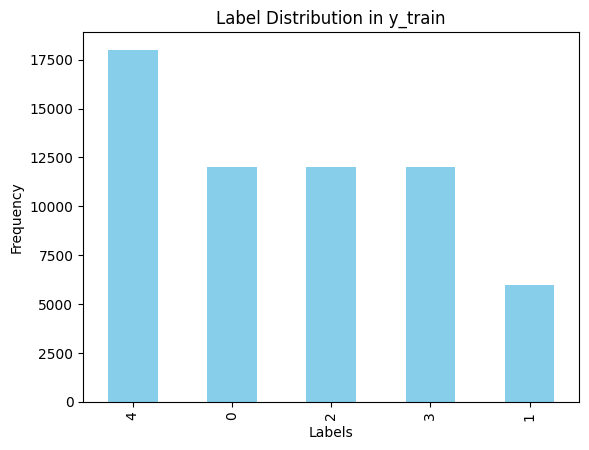

In [7]:
# Count label occurrences in y_train
label_counts = y_train['0'].value_counts()
print("Label distribution:\n", label_counts)

# Plot the label distribution
label_counts.plot(kind='bar', color='skyblue')
plt.title("Label Distribution in y_train")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.show()

#### Review sample images

Sample images for label 0:


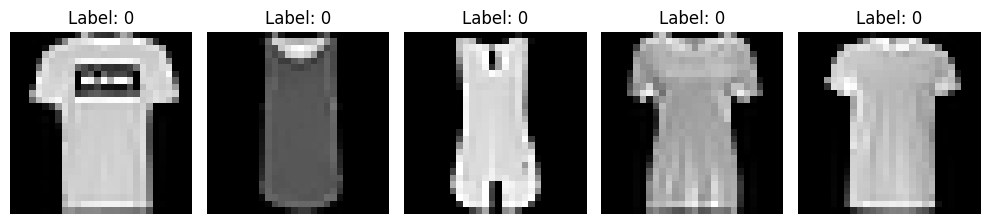

Sample images for label 1:


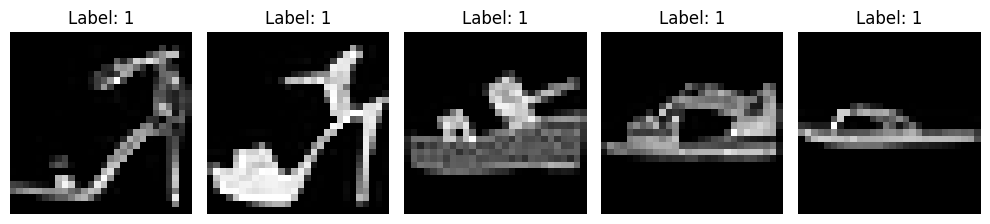

Sample images for label 2:


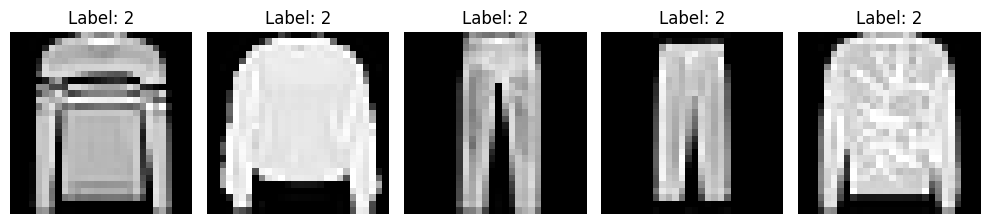

Sample images for label 3:


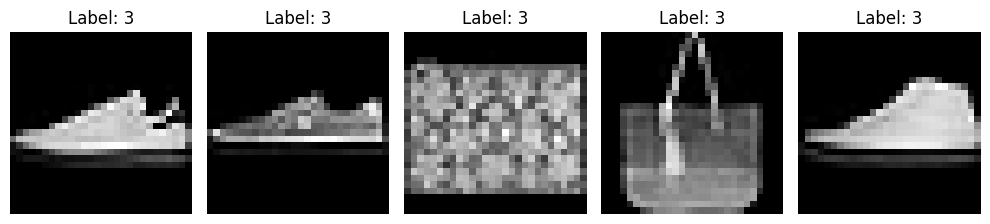

Sample images for label 4:


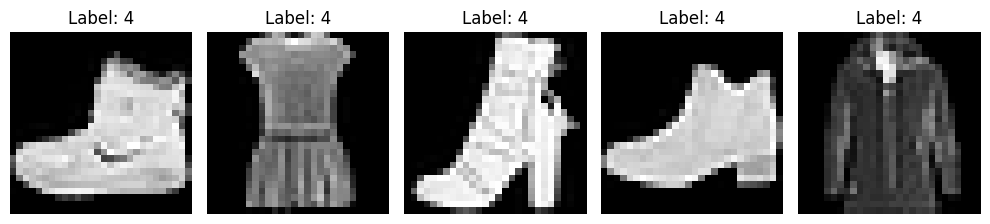

In [8]:
def plot_images_by_label(x_train, y_train, label, num_images=5):
    try:
        # Use the correct column name for labels
        label_column = '0'

        # Get the indices for the given label
        label_indices = y_train[y_train[label_column] == label].index

        # Check if there are enough images for the given label
        if len(label_indices) == 0:
            print(f"No images found for label {label}.")
            return

        # Select the first 'num_images' for this label
        sample_images = x_train.iloc[label_indices[:num_images]].values.reshape(-1, 28, 28)

        # Plot the images
        plt.figure(figsize=(10, 5))
        for i, img in enumerate(sample_images):
            plt.subplot(1, num_images, i + 1)
            plt.imshow(img, cmap='gray')
            plt.title(f"Label: {label}")
            plt.axis('off')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")

# Visualize 5 sample images for each label (0-4)
for label in range(5):
    print(f"Sample images for label {label}:")
    plot_images_by_label(x_train, y_train, label)


### Part A: Model Training and Evaluation

#### Shallow classifier model : KNN with K=5

- Simple shallow classifier 
- It is non parametric model
- It simply predict on distance metric
- It does not require complex transformation

##### Scale data for faster and accurate distance calculation

In [37]:
# Scale the data using standard scaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

##### Apply dimensionality reduction for better performance

In [38]:
# Use PCA for dimensionality reduction
pca = PCA(n_components=50)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)


##### Initialize model

In [12]:
# Initialize KNN model with optimized parameters
knn_model = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', n_jobs=-1)

##### Perform 5-fold cross-validation

In [13]:
# Perform 5-fold cross-validation on the scaled and PCA-transformed data
cv_scores_knn = cross_val_score(knn_model, x_train_pca, y_train['0'], cv=5, scoring='accuracy')
print(f"KNN Model CV Accuracy: {cv_scores_knn.mean():.4f}")

KNN Model CV Accuracy: 0.8894


##### Train and test model

In [18]:
# Train and Test
knn_model.fit(x_train_pca, y_train['0'])
y_pred_knn = knn_model.predict(x_test_pca)
knn_test_accuracy = accuracy_score(y_test['0'], y_pred_knn)
print(f"KNN Test Accuracy: {knn_test_accuracy:.4f}")

KNN Test Accuracy: 0.8866


#### Bagging

##### Define bagging model using base model as KNN modes ( baseline model )

In [ ]:
# Apply Bagging
bagging_model = BaggingClassifier(estimator=knn_model, n_estimators=10, random_state=42, n_jobs=-1)


##### Apply 5-fold cross validation

In [21]:
# Perform 5-fold cross-validation on the Bagging model
cv_scores_bagging = cross_val_score(bagging_model, x_train_pca, y_train['0'], cv=5, scoring='accuracy')
print(f"Bagging Model CV Accuracy: {cv_scores_bagging.mean():.4f}")

Bagging Model CV Accuracy: 0.8910


##### Train and test Bagging model

In [22]:
# Train and test Bagging model
bagging_model.fit(x_train_pca, y_train['0'])
y_pred_bagging = bagging_model.predict(x_test_pca)
bagging_test_accuracy = accuracy_score(y_test['0'], y_pred_bagging)
print(f"Bagging Test Accuracy: {bagging_test_accuracy:.4f}")

Bagging Test Accuracy: 0.8874


#### Boosting

##### Define boosting model

Unable to take KNN as base model for boosting as decision tree is base model for boosting classifier

In [26]:
# Apply Boosting (AdaBoost)
boosting_model = AdaBoostClassifier(n_estimators=10, random_state=42)

##### Apply 5-fold cross-validation

In [27]:
# Perform 5-fold cross-validation on the Boosting model
cv_scores_boosting = cross_val_score(boosting_model, x_train_pca, y_train['0'], cv=5, scoring='accuracy')
print(f"Boosting Model CV Accuracy: {cv_scores_boosting.mean():.4f}")

d:\Conestoga\CSCN8000-AIAM\CSCN8000\venvCSCN8000\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Conestoga\CSCN8000-AIAM\CSCN8000\venvCSCN8000\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Conestoga\CSCN8000-AIAM\CSCN8000\venvCSCN8000\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Conestoga\CSCN8000-AIAM\CSCN8000\venvCSCN8000\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be r

Boosting Model CV Accuracy: 0.5742


##### Train and test boosting model

In [28]:
# Train and test Boosting model
boosting_model.fit(x_train_pca, y_train['0'])
y_pred_boosting = boosting_model.predict(x_test_pca)
boosting_test_accuracy = accuracy_score(y_test['0'], y_pred_boosting)
print(f"Boosting Test Accuracy: {boosting_test_accuracy:.4f}")

d:\Conestoga\CSCN8000-AIAM\CSCN8000\venvCSCN8000\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosting Test Accuracy: 0.5636


#### Summary

| Model          | Test Accuracy  | Cross-Validation Accuracy |
|----------------|----------------|---------------------------|
| KNN ( K=5 )    | 0.8866         | 0.8894                    |
| Bagging Model  | 0.8874         | 0.8910                    |
| Boosting Model | 0.5636         | 0.5742                    |

- Bagging worked better than boosting in this scenario. The slight improvement over KNN indicates that bagging reduced variance without adding too much complexity.
- Boosting, with the current setup, didn’t provide any significant performance improvement and performed worse.
    - The shallow decision tree used in boosting (with max_depth=1) might be too simple to benefit from boosting, as it doesn't have enough complexity to learn meaningful patterns in the data.

### Guessing the Mystery Label

##### Helper.py

In [29]:
def get_hidden_layer_activations(model, X, layer_index):
    """Calculate the activations of a specified hidden layer.
    
    Parameters:
    - model: Trained instance of sklearn.neural_network.MLPClassifier.
    - X: Input data, numpy array of shape (n_samples, n_features).
    - layer_index: Index of the hidden layer for which to compute activations.
    
    Returns:
    - Activations of the specified hidden layer, numpy array of shape (n_samples, n_units_in_layer).
    """
    if layer_index < 0 or layer_index >= len(model.coefs_) - 1:
        raise ValueError("Invalid layer_index.")
    
    # Forward propagate through the network until the specified layer
    activations = X
    for i in range(layer_index + 1):
        activations = np.dot(activations, model.coefs_[i]) + model.intercepts_[i]
        if i < len(model.coefs_) - 1: 
            activations = np.maximum(0, activations)
    
    return activations

##### Train a Neural Network (MLP) with 3 Hidden Layers:

In [39]:
# Train the MLP model with 3 hidden layers [256, 128, 64]
mlp = MLPClassifier(hidden_layer_sizes=(256, 128, 64), max_iter=500, random_state=42)
mlp.fit(x_train_scaled, y_train)

d:\Conestoga\CSCN8000-AIAM\CSCN8000\venvCSCN8000\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(256, 128, 64), max_iter=500, random_state=42)

##### Generate Embeddings Using get_hidden_layer_activations

In [49]:
# Get embeddings (activations) from the last hidden layer (layer index 2)
embeddings = get_hidden_layer_activations(mlp, X_test_scaled, 2)

# Check the shape of the embeddings matrix
print(f"Shape of embeddings: {embeddings.shape}")

Shape of embeddings: (12000, 64)


##### Apply PCA - to reduce 2 dimentions

C:\Users\Khushbu.Lad\AppData\Local\Temp\ipykernel_41516\226177048.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], c=y_test, cmap='viridis', s=10)


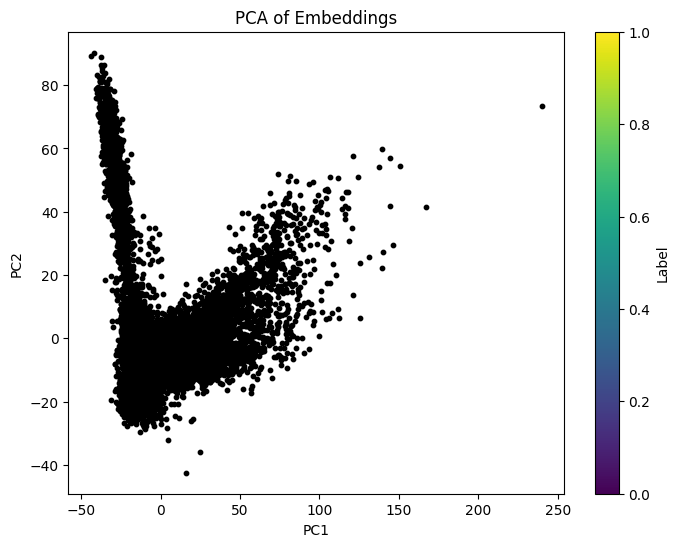

In [41]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(embeddings)

# Plot the PCA results with color-coded labels
plt.figure(figsize=(8, 6))
plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], c=y_test, cmap='viridis', s=10)
plt.colorbar(label='Label')
plt.title("PCA of Embeddings")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

##### Apply LDA

C:\Users\Khushbu.Lad\AppData\Local\Temp\ipykernel_41516\3724497804.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], c=y_test, cmap='viridis', s=10)


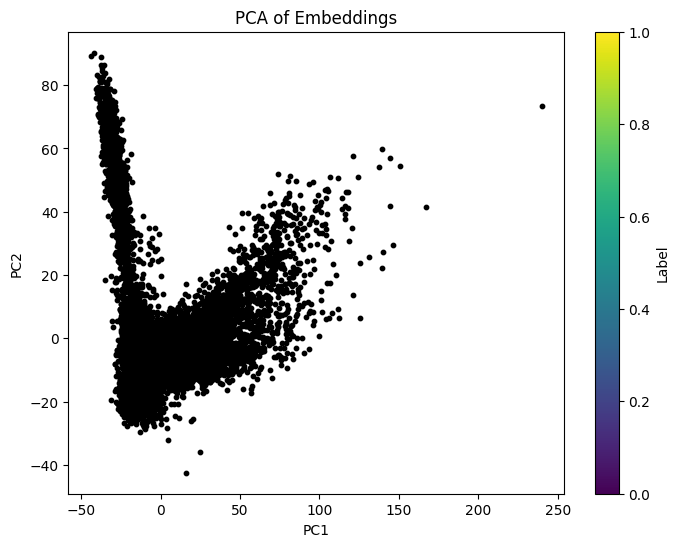

In [50]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(embeddings)

# Plot the PCA results with color-coded labels
plt.figure(figsize=(8, 6))
plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], c=y_test, cmap='viridis', s=10)
plt.colorbar(label='Label')
plt.title("PCA of Embeddings")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


##### K-Means on the generated embeddings with 5 clusters

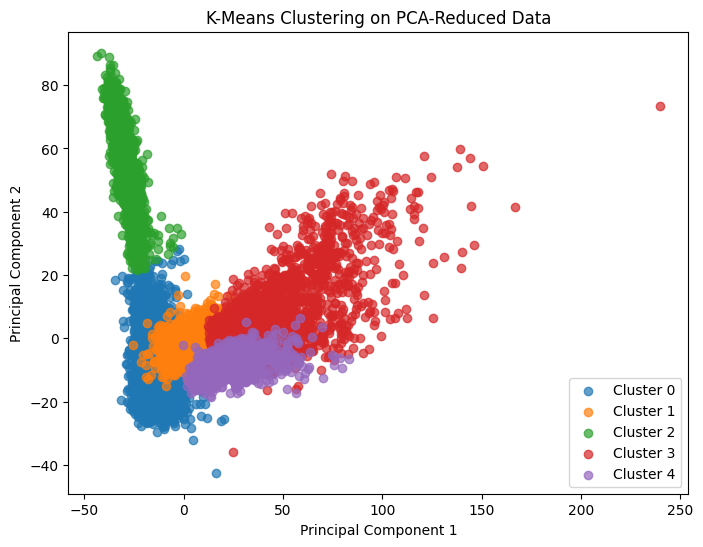

In [53]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(embeddings)

# Step 2: Plot PCA-reduced data with K-Means cluster assignments as color mappings
plt.figure(figsize=(8, 6))
for cluster in range(5):
    cluster_points = pca_embeddings[clusters == cluster]
    plt.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        label=f"Cluster {cluster}",
        alpha=0.7
    )

plt.title("K-Means Clustering on PCA-Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

##### Review images to see clusters names

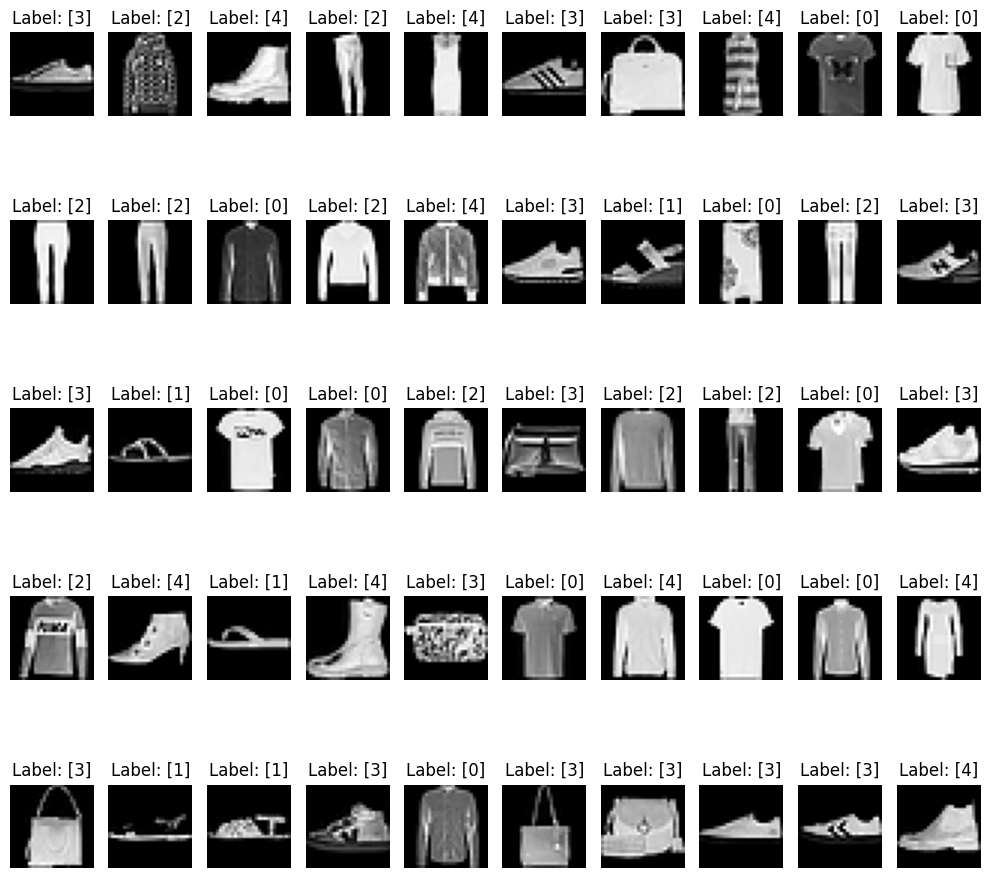

In [59]:
# Number of samples per cluster to visualize
num_samples_per_cluster = 10

# Plot random samples from each cluster
fig, axes = plt.subplots(n_clusters, num_samples_per_cluster, figsize=(10, 10))

for cluster in range(n_clusters):
    # Get indices of samples in the cluster and filter valid indices
    cluster_indices = np.where(clusters == cluster)[0]
    cluster_indices = cluster_indices[cluster_indices < len(x_test)]  # Ensure indices are within bounds

    # Check if there are enough samples in the cluster
    if len(cluster_indices) < num_samples_per_cluster:
        print(f"Cluster {cluster} has fewer than {num_samples_per_cluster} samples. Skipping.")
        continue

    # Select random samples from the cluster
    random_indices = np.random.choice(cluster_indices, num_samples_per_cluster, replace=False)

    for i, idx in enumerate(random_indices):
        axes[cluster, i].imshow(x_test[idx].reshape(28, 28), cmap='gray')
        axes[cluster, i].set_title(f"Label: {y_test[idx]}")
        axes[cluster, i].axis('off')

plt.tight_layout()
plt.show()


#### Conclusion

The images represents that label 1 and 4 represents shows, 0 and 2 contains clothing and 3 contains bags. 